In [22]:
## importing torch and relatied packages

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import transforms
from torchvision.models import resnet50, ResNet50_Weights

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import PIL
import glob
import os
from IPython.display import Image

In [24]:
## Praparing the data

data_path = "./sarscov2-ctscan-dataset/"
class_labels = os.listdir(data_path)
if '.DS_Store' in class_labels:
    class_labels.remove('.DS_Store')
class_labels

['non-COVID', 'COVID']

In [25]:
## Extrat the filepaths from the data on secondary memory
filepaths=glob.glob(data_path+"**/*.*")
filepaths[:10]

['./sarscov2-ctscan-dataset/non-COVID/Non-Covid (170).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (520).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (873).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (936).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (465).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (1180).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (29).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (609).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (259).png',
 './sarscov2-ctscan-dataset/non-COVID/Non-Covid (824).png']

In [26]:
## Creating pandas dataframe

df = pd.DataFrame()
df["filepaths"] = filepaths

# taking a look at df

df.head(10)

,filepaths
0,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
1,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
2,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
3,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
4,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
5,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
6,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
7,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
8,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...
9,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...


In [27]:
## Adding labels to the created dataframe

df["labels"] = df["filepaths"].apply(lambda x: x.split('/')[2])

# taking a look at df from the beginning

df.head(10)

,filepaths,labels
0,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
1,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
2,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
3,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
4,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
5,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
6,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
7,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
8,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID
9,./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...,non-COVID


In [28]:
# taking a look df from the end

df.tail(10)

,filepaths,labels
2471,./sarscov2-ctscan-dataset/COVID/Covid (268).png,COVID
2472,./sarscov2-ctscan-dataset/COVID/Covid (792).png,COVID
2473,./sarscov2-ctscan-dataset/COVID/Covid (287).png,COVID
2474,./sarscov2-ctscan-dataset/COVID/Covid (1246).png,COVID
2475,./sarscov2-ctscan-dataset/COVID/Covid (907).png,COVID
2476,./sarscov2-ctscan-dataset/COVID/Covid (454).png,COVID
2477,./sarscov2-ctscan-dataset/COVID/Covid (141).png,COVID
2478,./sarscov2-ctscan-dataset/COVID/Covid (1180).png,COVID
2479,./sarscov2-ctscan-dataset/COVID/Covid (511).png,COVID
2480,./sarscov2-ctscan-dataset/COVID/Covid (842).png,COVID


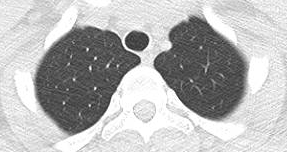

In [29]:
# Non-Covid
Image(df["filepaths"][0])

2480


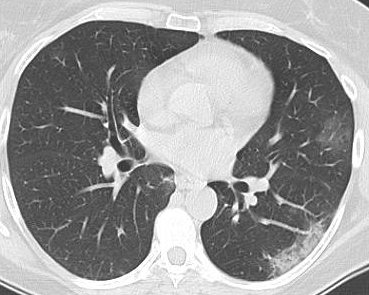

In [30]:
# Covid
print(len(df["filepaths"]) - 1)
Image(df["filepaths"][len(df["filepaths"]) - 1])

In [31]:
## Changing labels from text to binary values

df["labels"] = df["labels"].apply(lambda x: int(x == "COVID"))
df.tail(10)
df["labels"][2048]

1

In [32]:
## Current df

df.head(10), df.tail(10)

(                                           filepaths  labels
 0  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 1  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 2  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 3  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 4  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 5  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 6  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 7  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 8  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0
 9  ./sarscov2-ctscan-dataset/non-COVID/Non-Covid ...       0,
                                              filepaths  labels
 2471   ./sarscov2-ctscan-dataset/COVID/Covid (268).png       1
 2472   ./sarscov2-ctscan-dataset/COVID/Covid (792).png       1
 2473   ./sarscov2-ctscan-dataset/COVID/Covid (287).png       1
 2474  ./sarscov2-ctscan-dataset/COVID/Covid (1246).png      

In [33]:
## Split train and test data 

train_paths, test_paths, y_train, y_test = train_test_split(df["filepaths"].values,
                                                    df["labels"].values,
                                                    train_size=0.8,
                                                    shuffle=True
)
print(train_paths.shape,test_paths.shape,y_train.shape,y_test.shape)
train_paths[:10], y_train[:10]

(1984,) (497,) (1984,) (497,)


(array(['./sarscov2-ctscan-dataset/COVID/Covid (47).png',
        './sarscov2-ctscan-dataset/COVID/Covid (1037).png',
        './sarscov2-ctscan-dataset/COVID/Covid (514).png',
        './sarscov2-ctscan-dataset/non-COVID/Non-Covid (110).png',
        './sarscov2-ctscan-dataset/COVID/Covid (529).png',
        './sarscov2-ctscan-dataset/non-COVID/Non-Covid (831).png',
        './sarscov2-ctscan-dataset/non-COVID/Non-Covid (333).png',
        './sarscov2-ctscan-dataset/non-COVID/Non-Covid (608).png',
        './sarscov2-ctscan-dataset/COVID/Covid (313).png',
        './sarscov2-ctscan-dataset/COVID/Covid (595).png'], dtype=object),
 array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1]))

In [34]:
## Transform filepaths into actual image tensors

image_transform = transforms.Compose([
                                     transforms.Resize(size=(250, 250)),
                                     transforms.ToTensor()
])

# X = df["filepaths"].apply(lambda path: image_transform(PIL.Image.open(path).convert(mode="RGB"))).values
# ##X = torch.tensor(df["filepaths"].apply(lambda path: image_transform(PIL.Image.open(path).convert(mode="RGB"))).values)
# X = torch.stack(X, dim=0)
# X


In [35]:
## Custom Dataset class


class CstmDataset(Dataset):
    def __init__(self, paths, labels, transform):
        self.paths = paths
        self.labels = labels
        self.transform = transform

    def load_image(self, index: int):
        return PIL.Image.open(self.paths[index]).convert(mode="RGB")
    
    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index):
        img = self.load_image(index)
        label = self.labels[index]
        return self.transform(img), label




In [36]:
## Generating the train and test dataset in tensor form

train_dataset = CstmDataset(train_paths, y_train, image_transform)
test_dataset = CstmDataset(test_paths, y_test, image_transform)

In [37]:
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=32,shuffle=True)

In [38]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(in_features=model.fc.in_features,
                     out_features=1)

In [39]:
## Set up device for training

if torch.backends.mps.is_available():    # check if Apple Silicon mps is available
    device = "mps"
elif torch.cuda.is_available():          # check id cuda is available
    device = "cuda"
else:
    device = "cpu"                       # default to cpu if none are available

device

'mps'

In [40]:
## Selecting and caliberating the loss function and optimizer

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = nn.BCEWithLogitsLoss()

In [41]:
def train(model,train_loader,test_loader,device,optimizer,loss_fn,batch_size,epochs):
    model=model.to(device)
    
    for epoch in range(epochs):
        model.train()
        
        train_loss=0
        train_accuracy=0
        test_loss=0
        test_accuracy=0
        
        for X,y in train_loader:
            X=X.to(device)
            y=y.to(device)
            
            # forward pass
            logits=model(X).view(-1)
            pred=torch.sigmoid(logits)
            pred=torch.round(pred)
            
            # loss calculation
            loss=loss_fn(logits, y.float())
            cur_train_loss=loss.item()
            
            # backpropagation
            optimizer.zero_grad() 
            loss.backward()
            optimizer.step()
            
            cur_train_accuracy=(pred==y).sum().item()/batch_size
            
            train_accuracy+=cur_train_accuracy
            train_loss+=cur_train_loss
        model.eval()
        with torch.inference_mode():
            for X,y in test_loader:
                X=X.to(device)
                y=y.to(device)
                
                logits=model(X).view(-1)
                pred=torch.sigmoid(logits)
                pred=torch.round(pred)
                
                loss=loss_fn(logits,y.float())
                cur_test_loss=loss.item()
                cur_test_accuracy=(pred==y).sum().item()/batch_size
                
                test_loss+=cur_test_loss
                test_accuracy+=cur_test_accuracy
        
        train_loss=train_loss/len(train_loader)
        train_accuracy=train_accuracy/len(train_loader)
        test_loss=test_loss/len(test_loader)
        test_accuracy=test_accuracy/len(test_loader)
        
        print(f"[{(epoch+1):>2d}/{epochs:>2d}] || train_accuracy:{train_accuracy:>5f} || train_loss:{train_loss:>5f} || val_accuracy:{test_accuracy:>5f} || val_loss:{test_loss:>5f}")

In [42]:
train(model,train_loader,test_loader,device,optimizer,loss_fn,batch_size=32,epochs=1)

[ 1/ 1] || train_accuracy:0.726815 || train_loss:0.584576 || val_accuracy:0.718750 || val_loss:0.594216
